# 캔들차트를 CNN 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score

## 캔들차트 이미지 가져오기

In [2]:
%%time
X = []
for i in range(1188) : 
    img = Image.open(f'/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/pic_data/{i}.png')
    img = img.resize((150,150))
    img_array = np.array(img)
    X.append(img_array)

CPU times: user 2.71 s, sys: 31.9 ms, total: 2.74 s
Wall time: 2.74 s


In [3]:
X = np.array(X)

In [4]:
X.shape

(1188, 150, 150, 4)

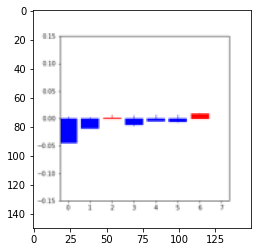

In [5]:
plt.imshow(X[5])

In [6]:
df = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/kospi_upw.csv')
y = df['0'].values
y = y.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape, y_train.shape

((950, 150, 150, 4), (950, 1))

In [12]:
X_test.shape, y_test.shape

((238, 150, 150, 4), (238, 1))

## DeepLearning 적용(CNN)

In [13]:
leaky_relu = tf.nn.leaky_relu
# leaky_relu = 'relu'

model = models.Sequential()

model.add(layers.Input(shape=(150,150,4)))
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.BatchNormalization())            

model.add(layers.Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation=leaky_relu))

model.add(layers.Dense(1, activation='linear'))

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 4)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 4)       16        
_________________________________________________________________
conv2d (Conv2D)              (None, 149, 149, 16)      272       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      2080      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1364224)           0         
_________________________________________________________________
dense (Dense)             

2021-11-25 11:09:01.797034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-25 11:09:01.797294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
%%time
model.fit(X_train, y_train, validation_split=0.4, epochs=50, batch_size=2, verbose=1)

2021-11-25 11:09:03.790878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-25 11:09:03.791186: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-25 11:09:03.923403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
285/285 [==============================] - ETA: 0s - loss: 1488.5663

2021-11-25 11:09:33.347740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


285/285 [==============================] - 32s 110ms/step - loss: 1488.5663 - val_loss: 0.0169
Epoch 2/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0830 - val_loss: 0.0329
Epoch 3/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0212 - val_loss: 0.0417
Epoch 4/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0095 - val_loss: 0.0108
Epoch 5/50
285/285 [==============================] - 32s 111ms/step - loss: 0.0069 - val_loss: 0.0029
Epoch 6/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 7/50
285/285 [==============================] - 32s 111ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0044 - val_loss: 0.0057
Epoch 9/50
285/285 [==============================] - 31s 110ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 10/50
285/285 [==============================] - 32s 111ms/step - loss: 0.0

In [16]:
model.save('./16326464')

2021-11-25 11:35:43.902976: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./16326464/assets


## 결과 확인

In [17]:
%%time

preds = model.predict(X_test)

2021-11-25 11:35:49.346688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


CPU times: user 428 ms, sys: 1.56 s, total: 1.99 s
Wall time: 12.4 s


In [18]:
preds

array([[-7.56625179e-03],
       [-4.59459331e-03],
       [ 2.66720844e-03],
       [-1.10540236e-03],
       [ 8.69459193e-03],
       [ 9.82838916e-04],
       [-7.66671030e-04],
       [ 1.21085276e-03],
       [ 1.21153323e-02],
       [ 5.35240117e-03],
       [-2.59371730e-03],
       [ 5.70139941e-03],
       [ 2.66425777e-05],
       [-5.26934210e-03],
       [-6.43282663e-03],
       [-3.53654730e-03],
       [ 1.08786975e-03],
       [ 1.41130690e-03],
       [-1.46483700e-03],
       [-1.77639793e-03],
       [ 2.15640962e-02],
       [-1.96338515e-03],
       [ 1.06828962e-03],
       [ 1.99035858e-03],
       [ 4.76428028e-03],
       [ 1.12054562e-02],
       [ 5.22174407e-03],
       [ 7.52968248e-03],
       [ 1.66636705e-02],
       [-2.86598457e-04],
       [ 5.00677060e-03],
       [ 1.11903180e-03],
       [-3.28127551e-03],
       [ 2.92618992e-04],
       [-1.87722389e-02],
       [ 8.93550646e-03],
       [ 1.22187054e-02],
       [ 5.60226943e-03],
       [-5.7

In [19]:
r2_score(preds.reshape(-1,1), y_test.reshape(-1,1))

-1.5511121041638725

In [20]:
score_dict = {
    'preds' : list(preds.reshape(-1)),
    'real' : list(y_test.reshape(-1))
}

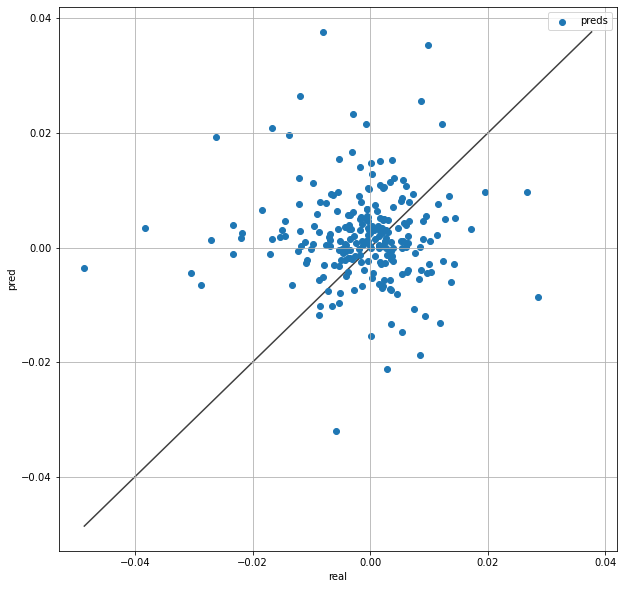

In [21]:
pred_df = pd.DataFrame(score_dict)
lims = [
#     np.min([-0.5, -0.5]),
#     np.max([0.5, 0.5])
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.preds, marker='o', label='preds')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

In [22]:
preds = model.predict(X_train)
score_dict = {
    'preds' : list(preds.reshape(-1)),
    'real' : list(y_train.reshape(-1))
}

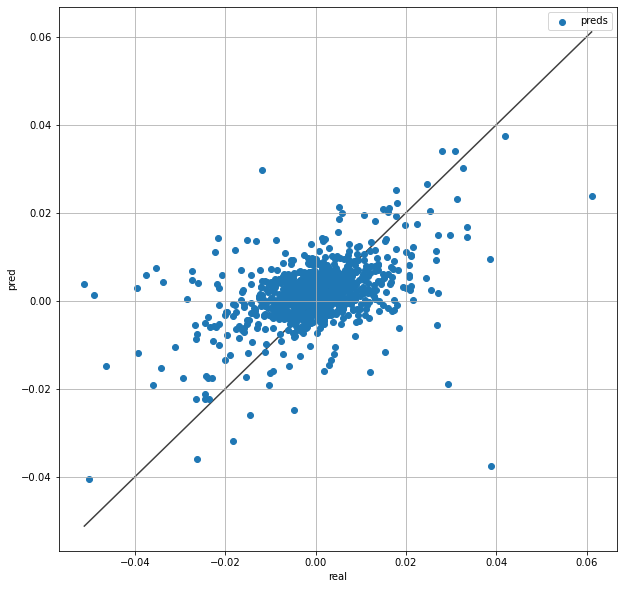

In [23]:
pred_df = pd.DataFrame(score_dict)
lims = [
#     np.min([-0.5, -0.5]),
#     np.max([0.5, 0.5])
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.preds, marker='o', label='preds')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()